In [1]:
import pandas as pd

In [2]:
HeartData=pd.read_csv('HeartDiseaseData.csv',encoding='latin')

In [3]:
HeartData.head(5)

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


<b>Problem Statement</b>
Create a model to identify whether or not if a person is likely to develop a heart disease or not in 10 years?

In [4]:
print('Shape of Heart Data',HeartData.shape)

#Removing Duplicates from the data, if any exists
HeartData=HeartData.drop_duplicates()
print('Shape of Heart Data after removing duplicates ',HeartData.shape)

Shape of Heart Data (4238, 16)
Shape of Heart Data after removing duplicates  (4238, 16)


In [5]:
HeartData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sex              4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 562.9 KB


In [6]:
HeartData.nunique()

sex                   2
age                  39
education             4
currentSmoker         2
cigsPerDay           33
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             248
sysBP               234
diaBP               146
BMI                1363
heartRate            73
glucose             143
TenYearCHD            2
dtype: int64

# Continuous
* age                  
* cigsPerDay           
* totChol             
* sysBP               
* diaBP               
* BMI                
* heartRate            
* glucose

# Categorical

* sex
* education
* currentSmoker
* BPMeds
* prevalentSmoker
* prevalentHyp          
* prevalentHyp          
* diabetes              

# Target variable
* TenYearCHD            

# Treating Missing values

In [7]:
HeartData.isnull().sum()

sex                  0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

education and BPMeds are categorical varibales having missing values.

cigsPerDay, totChol, BMI, heartRate, glucose are continuous variables having missing values

In [8]:
# MODE for categorical columns and Median for continuous columns
HeartData['education'].fillna(HeartData['education'].mode()[0], inplace=True)
HeartData['BPMeds'].fillna(HeartData['BPMeds'].mode()[0], inplace=True)
HeartData['cigsPerDay'].fillna(HeartData['cigsPerDay'].mode()[0], inplace=True)
HeartData['totChol'].fillna(HeartData['totChol'].median(), inplace=True)
HeartData['BMI'].fillna(HeartData['BMI'].median(), inplace=True)
HeartData['heartRate'].fillna(HeartData['heartRate'].median(), inplace=True)
HeartData['glucose'].fillna(HeartData['glucose'].median(), inplace=True)

In [9]:
HeartData.isnull().sum()

sex                0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [10]:
# Looking at the statistial distribution of the data
HeartData.describe(include='all')

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000
mean,0.429212,49.584946,1.954696,0.494101,8.941482,0.029259,0.005899,0.310524,0.025720,236.689476,132.352407,82.893464,25.800205,75.878716,81.603587,0.151958
std,0.495022,8.572160,1.018510,0.500024,11.902399,0.168552,0.076587,0.462763,0.158316,44.327427,22.038097,11.910850,4.071041,12.025185,22.865246,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,72.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,89.875000,28.037500,83.000000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


# Target Variable Distribution

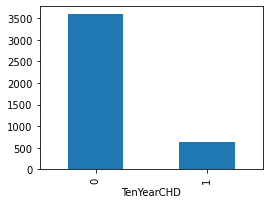

In [11]:
%matplotlib inline
# Creating Bar chart as the Target variable is Categorical
GroupedData=HeartData.groupby('TenYearCHD').size()
GroupedData.plot(kind='bar', figsize=(4,3))

Visualizing distribution of categorical variables and continuous variables

* Categorical ----- Bar Plot
* Continuous ------Histogram

In [12]:
HeartData.columns

Index(['sex', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C8C5C8E048>,
      dtype=object)

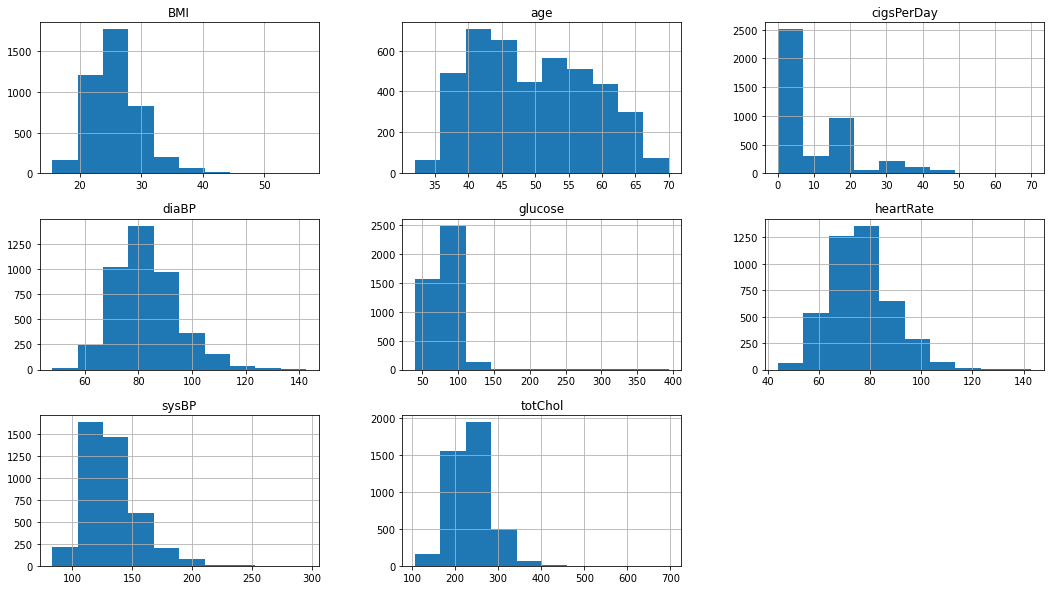

In [14]:
HeartData.hist(['age',  'cigsPerDay', 
        'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose'],figsize=(18,10))

In [15]:
def PlotBarCharts(inpData,colstoPlot):
    import matplotlib.pyplot as plt
    fig, subPlot=plt.subplots(nrows=1,ncols=len(colstoPlot),figsize=(18,5))
    fig.suptitle('Bar Charts of '+str(colstoPlot))
    
    for colName,plotNumber in zip(colstoPlot,range(len(colstoPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

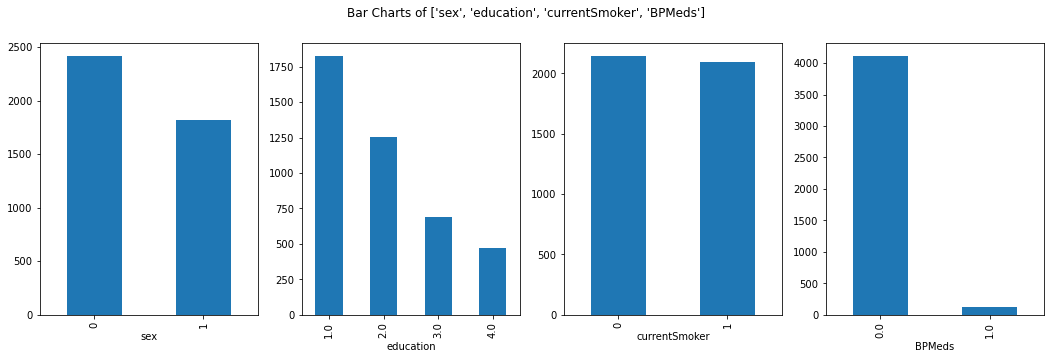

In [17]:
PlotBarCharts(HeartData,['sex', 'education', 'currentSmoker', 'BPMeds'])

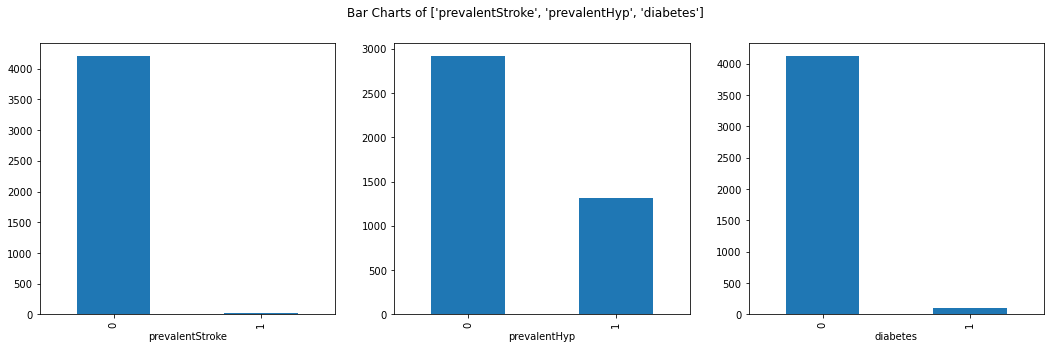

In [18]:
PlotBarCharts(HeartData,['prevalentStroke', 'prevalentHyp', 'diabetes'])

# Exploring relationship of predictors with target variable
* categorical vs Categorical -----Bar PLot
* Continuous vs Categorical -------Bar Plot, Box Plot

In [20]:
# BarPlot
def PlotBarPlots(inpData,colstoPlot,targetVariable):
    import matplotlib.pyplot as plt
    fig,subPlot=plt.subplots(nrows=1,ncols=len(colstoPlot),figsize=(18,5))
    GroupedData=inpData.groupby(targetVariable)
    for colName,plotNumber in zip (colstoPlot,range(len(colstoPlot))):
        GroupedData.mean()[colName].plot(kind='bar',ax=subPlot[plotNumber])

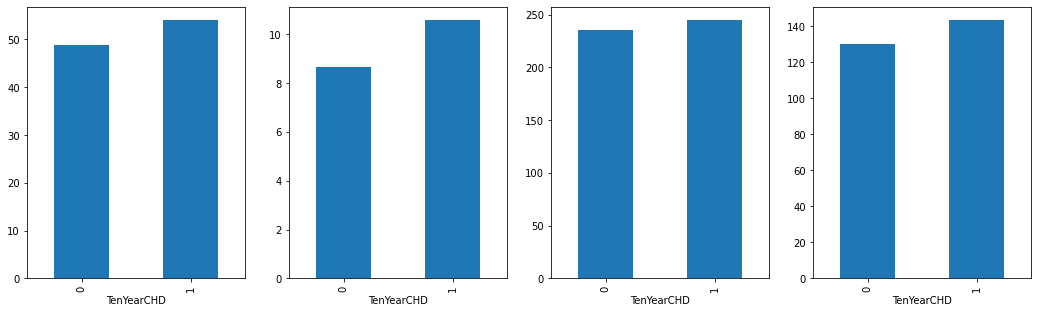

In [22]:
PlotBarPlots(HeartData,['age',  'cigsPerDay', 
        'totChol', 'sysBP'],'TenYearCHD')

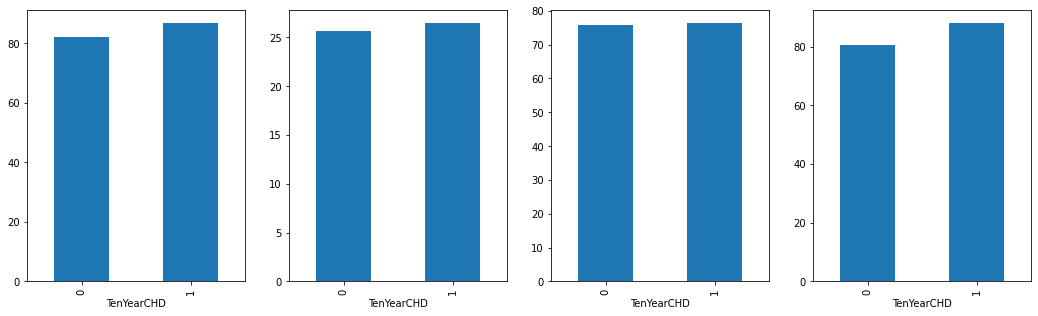

In [23]:
PlotBarPlots(HeartData,['diaBP', 'BMI', 'heartRate', 'glucose'],'TenYearCHD')

In [24]:
# BoxPlot
def PlotBoxPlot(inpData,colstoPlot,targetVariable):
    import matplotlib.pyplot as plt
    fig,subPlot=plt.subplots(nrows=1,ncols=len(colstoPlot),figsize=(18,5))
    fig.suptitle('BoxPlot of '+targetVariable+' vs'+str(colstoPlot))
    for colName,plotNumber in zip(colstoPlot,range(len(colstoPlot))):
        inpData.boxplot(column=colName,by=targetVariable,ax=subPlot[plotNumber])

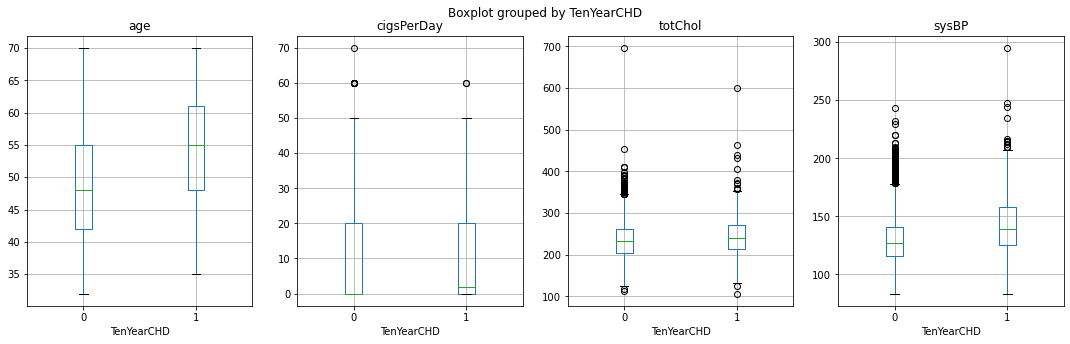

In [25]:
PlotBoxPlot(HeartData,['age',  'cigsPerDay', 'totChol', 'sysBP'],'TenYearCHD')

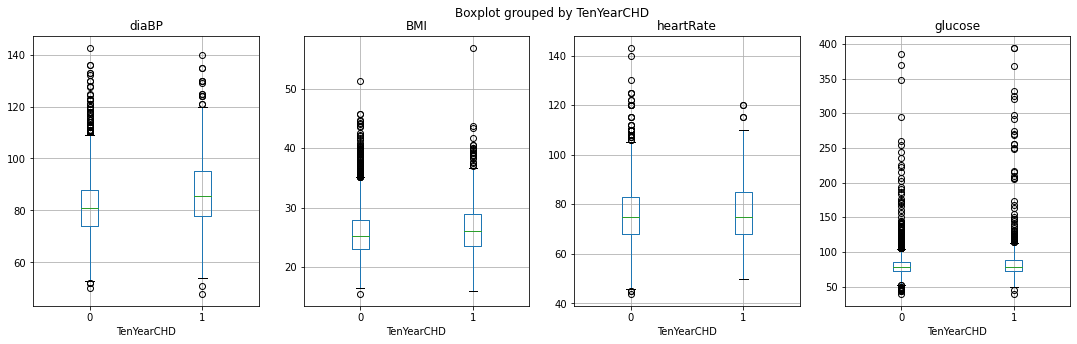

In [26]:
PlotBoxPlot(HeartData,['diaBP', 'BMI', 'heartRate', 'glucose'],'TenYearCHD')

In [27]:
HeartData['totChol'][HeartData['totChol']>500]=460

C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [28]:
HeartData['sysBP'][HeartData['sysBP']>260]=250

C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [30]:
HeartData['BMI'][HeartData['BMI']>45]=45.8

C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [33]:
HeartData['cigsPerDay'][HeartData['cigsPerDay']>60]=60

C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


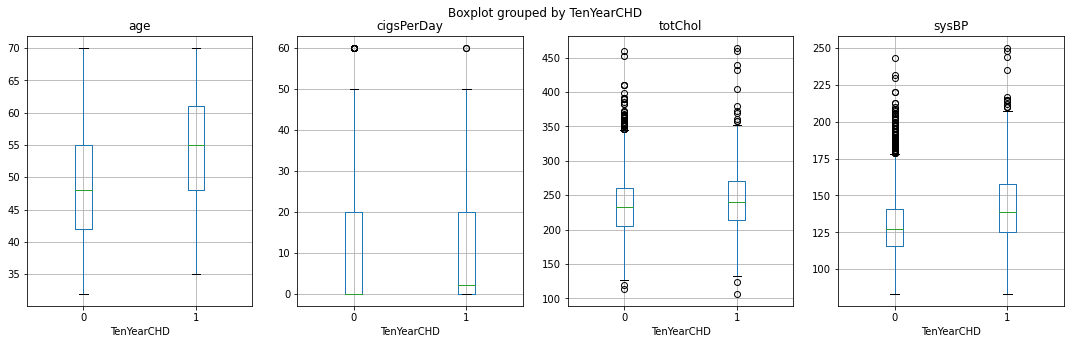

In [36]:
PlotBoxPlot(HeartData,['age',  'cigsPerDay', 'totChol', 'sysBP'],'TenYearCHD')

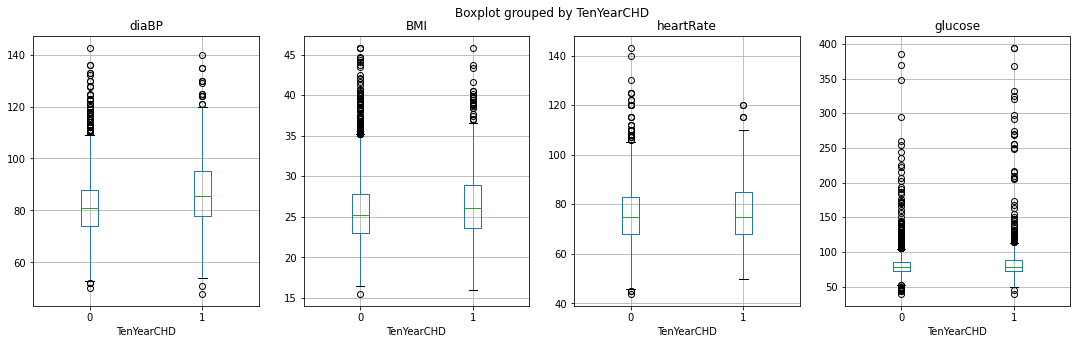

In [37]:
PlotBoxPlot(HeartData,['diaBP', 'BMI', 'heartRate', 'glucose'],'TenYearCHD')

In [ ]:
'age',  'cigsPerDay', 'totChol', 'sysBP','diaBP', 'BMI', 'heartRate', 'glucose'

In [45]:
from termcolor import colored

In [58]:
#Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(colored(predictor,'red'),colored(' is correlated to TenYearCHD','red'))
            SelectedPredictors.append(predictor)
        else:
            print(colored(predictor,'red'),colored(' is ','red'),'NOT',colored(' correlated to TenYearCHD','red'))
    
    return(SelectedPredictors)

In [59]:
ContinuousVariables=['age',  'cigsPerDay', 'totChol', 'sysBP','diaBP', 'BMI', 'heartRate', 'glucose']
FunctionAnova(inpData=HeartData, TargetVariable='TenYearCHD', ContinuousPredictorList=ContinuousVariables)

##### ANOVA Results ##### 

age  is correlated to TenYearCHD
cigsPerDay  is correlated to TenYearCHD
totChol  is correlated to TenYearCHD
sysBP  is correlated to TenYearCHD
diaBP  is correlated to TenYearCHD
BMI  is correlated to TenYearCHD
heartRate  is  NOT  correlated to TenYearCHD
glucose  is correlated to TenYearCHD


['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'glucose']

# Categorical vs Categorical------Bar Charts------Chi-Squared Test

In [60]:
def CrossTabPlots(inpData,colstoPlot,targetVariable):
    import matplotlib.pyplot as plt
    fig,subPlot=plt.subplots(nrows=1,ncols=len(colstoPlot),figsize=(18,5))
    for colName, plotNumber in zip (colstoPlot,range(len(colstoPlot))):
        pd.crosstab(index=inpData[colName], columns=inpData[targetVariable]).plot(kind='bar',ax=subPlot[plotNumber])

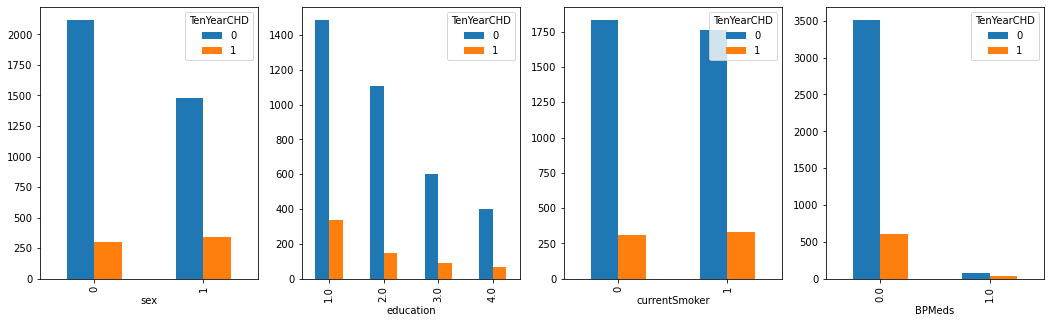

In [62]:
CrossTabPlots(HeartData,['sex', 'education', 'currentSmoker', 'BPMeds'],'TenYearCHD')

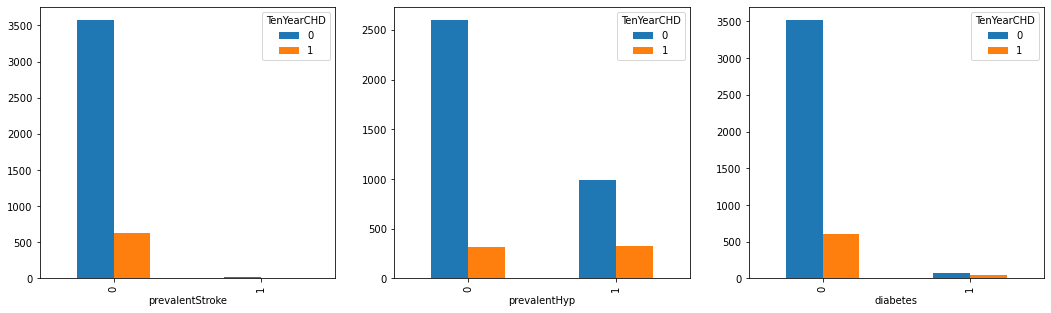

In [63]:
CrossTabPlots(HeartData,['prevalentStroke', 'prevalentHyp', 'diabetes'],'TenYearCHD')

We dont have enough data fro BPMeds, PrevalentStroke and diabetes. So we conclude these columns are irrelevant.

In [64]:
from scipy.stats import chi2_contingency
def ChiSquared(inpData,predictors,targetVariable):
    for contPredictor in predictors:
        CrossTabResult=pd.crosstab(index=inpData[contPredictor], columns=inpData[targetVariable])
        ChiSquaredResult=chi2_contingency(CrossTabResult)
        print('P-Value for Chi-Squared test for',contPredictor ,'is: ', ChiSquaredResult[1])
        if(ChiSquaredResult[1]<0.05):
            print(colored(contPredictor,'red'),colored(' is correlated to TenYearCHD','red'))

In [65]:
ChiSquared(HeartData,['sex', 'education', 'currentSmoker', 'BPMeds','prevalentStroke', 'prevalentHyp', 'diabetes'],'TenYearCHD')

P-Value for Chi-Squared test for sex is:  1.1073976912877559e-08
sex  is correlated to TenYearCHD
P-Value for Chi-Squared test for education is:  8.770368701361081e-07
education  is correlated to TenYearCHD
P-Value for Chi-Squared test for currentSmoker is:  0.2210247224594497
P-Value for Chi-Squared test for BPMeds is:  3.82388802600957e-08
BPMeds  is correlated to TenYearCHD
P-Value for Chi-Squared test for prevalentStroke is:  0.00018080313034275284
prevalentStroke  is correlated to TenYearCHD
P-Value for Chi-Squared test for prevalentHyp is:  1.0998229381834027e-30
prevalentHyp  is correlated to TenYearCHD
P-Value for Chi-Squared test for diabetes is:  5.641334407100521e-10
diabetes  is correlated to TenYearCHD


In [68]:
IrrelevantColumns=['BPMeds','prevalentStroke','diabetes']

In [70]:
HeartData = HeartData.drop(IrrelevantColumns,axis=1)
HeartData.head()

,sex,age,education,currentSmoker,cigsPerDay,prevalentHyp,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,1,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


### Treating Outliers

Already Done

In [71]:
#Converting data to pickle file
#HeartData.to_pickle('F:\IVY PRO\Python\Assignments\EDA2\PKL files\HeartRiskData.pkl')

# Machine Learning: Splitting the data into Training and Testing sample


In [72]:
HeartData.columns

Index(['sex', 'age', 'education', 'currentSmoker', 'cigsPerDay',
       'prevalentHyp', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate',
       'glucose', 'TenYearCHD'],
      dtype='object')

In [73]:
# Separate Target Variable and Predictor Variables
TargetVariable='TenYearCHD'
Predictors=['sex', 'age', 'education', 'currentSmoker', 'cigsPerDay',
       'prevalentHyp', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate',
       'glucose']

X=HeartData[Predictors].values
y=HeartData[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [74]:
# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2966, 12)
(2966,)
(1272, 12)
(1272,)


In [75]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [76]:
X_train[0:3]

array([[0.        , 0.26315789, 0.        , 1.        , 0.15      ,
        1.        , 0.46778711, 0.30930931, 0.44444444, 0.21976206,
        0.26262626, 0.10734463],
       [0.        , 0.84210526, 0.        , 0.        , 0.        ,
        1.        , 0.49859944, 0.45945946, 0.41269841, 0.47686715,
        0.21212121, 0.13276836],
       [0.        , 0.18421053, 0.33333333, 0.        , 0.        ,
        0.        , 0.2745098 , 0.12312312, 0.27513228, 0.1655651 ,
        0.24242424, 0.10734463]])

### Logistic Regression

In [77]:
#import LogisticRegression from sklearn
from sklearn.linear_model import LogisticRegression
#clf=classifier
clf=LogisticRegression(penalty='l2',C=1,solver='newton-cg')

print(clf)

#Fitting LogReg on training data
LogReg=clf.fit(X_train,y_train)
#Predicting the values of target variable for testing data
Prediction=LogReg.predict(X_test)

# Measuring accuracy, i.e., classification report and confusion matrix
from sklearn import metrics 
print(metrics.classification_report(y_test,Prediction))
print(metrics.confusion_matrix(y_test,Prediction))

F_1Score=metrics.classification_report(y_test,Prediction).split()[-2]
# The avove command will give all the elements return row by row. Final Accuracy of the model is the weighted accuracy.
#Hence, 2nd last item
print('Accuracy of the model :',F_1Score)

# Printing some predicted data values
TestingDataResults=pd.DataFrame(data=X_test,columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults['Predicted'+TargetVariable]=Prediction
TestingDataResults.head(5)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      1084
           1       0.71      0.06      0.12       188

    accuracy                           0.86      1272
   macro avg       0.78      0.53      0.52      1272
weighted avg       0.84      0.86      0.80      1272

[[1079    5]
 [ 176   12]]
Accuracy of the model : 0.80


,sex,age,education,currentSmoker,cigsPerDay,prevalentHyp,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,PredictedTenYearCHD
0,1.0,0.815789,0.000000,0.0,0.000000,1.0,0.232493,0.387387,0.444444,0.383014,0.282828,0.129944,0,0
1,1.0,0.342105,0.666667,0.0,0.000000,0.0,0.154062,0.249249,0.433862,0.411104,0.414141,0.121469,0,0
2,0.0,0.500000,0.000000,1.0,0.033333,0.0,0.431373,0.261261,0.349206,0.155321,0.313131,0.158192,0,0
3,1.0,0.342105,0.666667,1.0,0.500000,0.0,0.400560,0.255255,0.439153,0.434237,0.313131,0.146893,0,0
4,0.0,0.342105,0.333333,1.0,0.050000,0.0,0.400560,0.279279,0.338624,0.155321,0.464646,0.129944,0,0


In [79]:
print('Accuracy of Model is',metrics.f1_score(y_test, Prediction, average='weighted'))

Accuracy of Model is 0.8035582115644335


## Decision Trees

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1084
           1       0.39      0.08      0.13       188

    accuracy                           0.85      1272
   macro avg       0.63      0.53      0.52      1272
weighted avg       0.79      0.85      0.80      1272

[[1061   23]
 [ 173   15]]
Accuracy of the model: 0.8


,sex,age,education,currentSmoker,cigsPerDay,prevalentHyp,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,PredictedTenYearCHD
0,1.0,0.815789,0.000000,0.0,0.000000,1.0,0.232493,0.387387,0.444444,0.383014,0.282828,0.129944,0,0
1,1.0,0.342105,0.666667,0.0,0.000000,0.0,0.154062,0.249249,0.433862,0.411104,0.414141,0.121469,0,0
2,0.0,0.500000,0.000000,1.0,0.033333,0.0,0.431373,0.261261,0.349206,0.155321,0.313131,0.158192,0,0
3,1.0,0.342105,0.666667,1.0,0.500000,0.0,0.400560,0.255255,0.439153,0.434237,0.313131,0.146893,0,0
4,0.0,0.342105,0.333333,1.0,0.050000,0.0,0.400560,0.279279,0.338624,0.155321,0.464646,0.129944,0,0


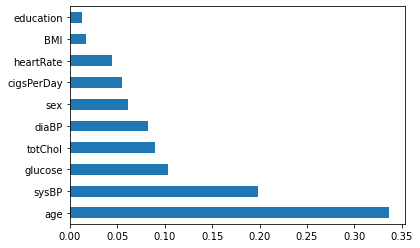

In [101]:
#Decision Trees
from sklearn import tree
#choose from different tunable hyper parameters
clf = tree.DecisionTreeClassifier(max_depth=5,criterion='gini')

# Printing all the parameters of Decision Trees
print(clf)

# Creating the model on Training Data
DTree=clf.fit(X_train,y_train)
prediction=DTree.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model:', round(F1_Score,2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DTree.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults['Predicted'+ TargetVariable]=prediction
TestingDataResults.head()

In [102]:
print('Accuracy of Model is',metrics.f1_score(y_test, prediction, average='weighted'))

Accuracy of Model is 0.7997621274128636


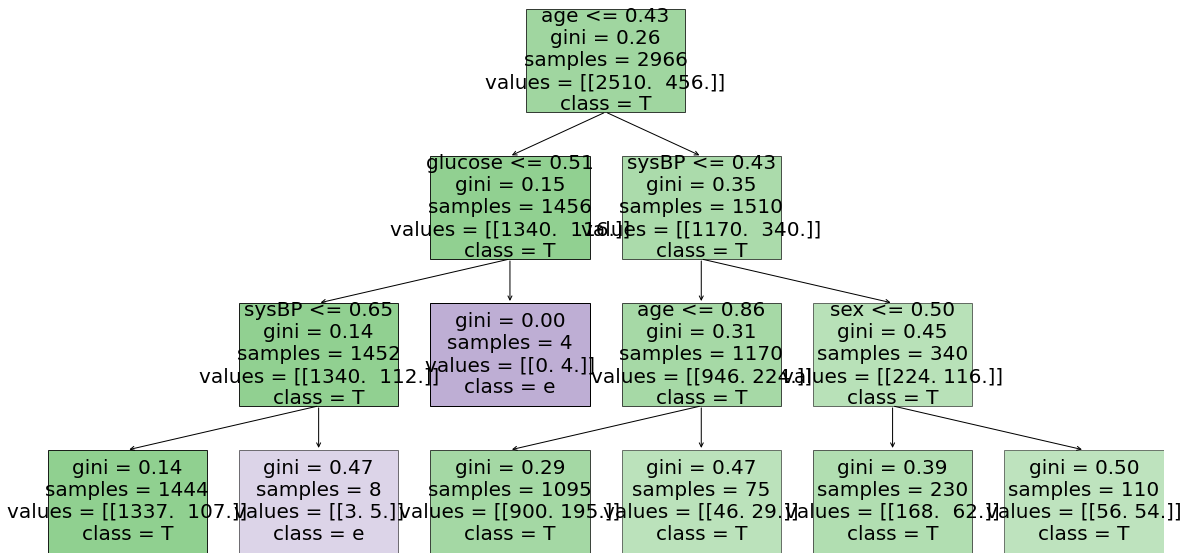

In [100]:
from dtreeplt import dtreeplt
import matplotlib.pyplot as plt
#fig, subplt=plt.subplots(nrows=1,ncols=1, figsize=(10, 10))
dtree = dtreeplt(model=clf, feature_names=Predictors, target_names=TargetVariable)
fig = dtree.view()
currentFigure=plt.gcf()
currentFigure.set_size_inches(20,10)

## Random Forest

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      1084
           1       0.67      0.05      0.10       188

    accuracy                           0.86      1272
   macro avg       0.76      0.52      0.51      1272
weighted avg       0.83      0.86      0.80      1272

[[1079    5]
 [ 178   10]]
Accuracy of the model: 0.8


,sex,age,education,currentSmoker,cigsPerDay,prevalentHyp,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,PredictedTenYearCHD
0,1.0,0.815789,0.000000,0.0,0.000000,1.0,0.232493,0.387387,0.444444,0.383014,0.282828,0.129944,0,0
1,1.0,0.342105,0.666667,0.0,0.000000,0.0,0.154062,0.249249,0.433862,0.411104,0.414141,0.121469,0,0
2,0.0,0.500000,0.000000,1.0,0.033333,0.0,0.431373,0.261261,0.349206,0.155321,0.313131,0.158192,0,0
3,1.0,0.342105,0.666667,1.0,0.500000,0.0,0.400560,0.255255,0.439153,0.434237,0.313131,0.146893,0,0
4,0.0,0.342105,0.333333,1.0,0.050000,0.0,0.400560,0.279279,0.338624,0.155321,0.464646,0.129944,0,0


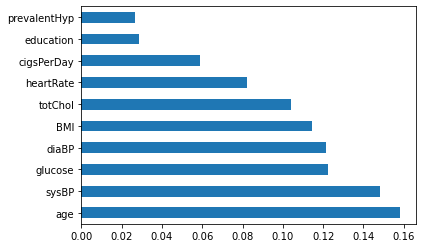

In [110]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=9, n_estimators=500,criterion='gini')

# Printing all the parameters of Random Forest
print(clf)

# Creating the model on Training Data
RF=clf.fit(X_train,y_train)
prediction=RF.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model:', round(F1_Score,2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults['Predicted'+ TargetVariable]=prediction
TestingDataResults.head()

In [111]:
print('Accuracy of Model is',metrics.f1_score(y_test, prediction, average='weighted'))

Accuracy of Model is 0.8001446709090178


### Plotting one of the Decision Trees in Random Forest

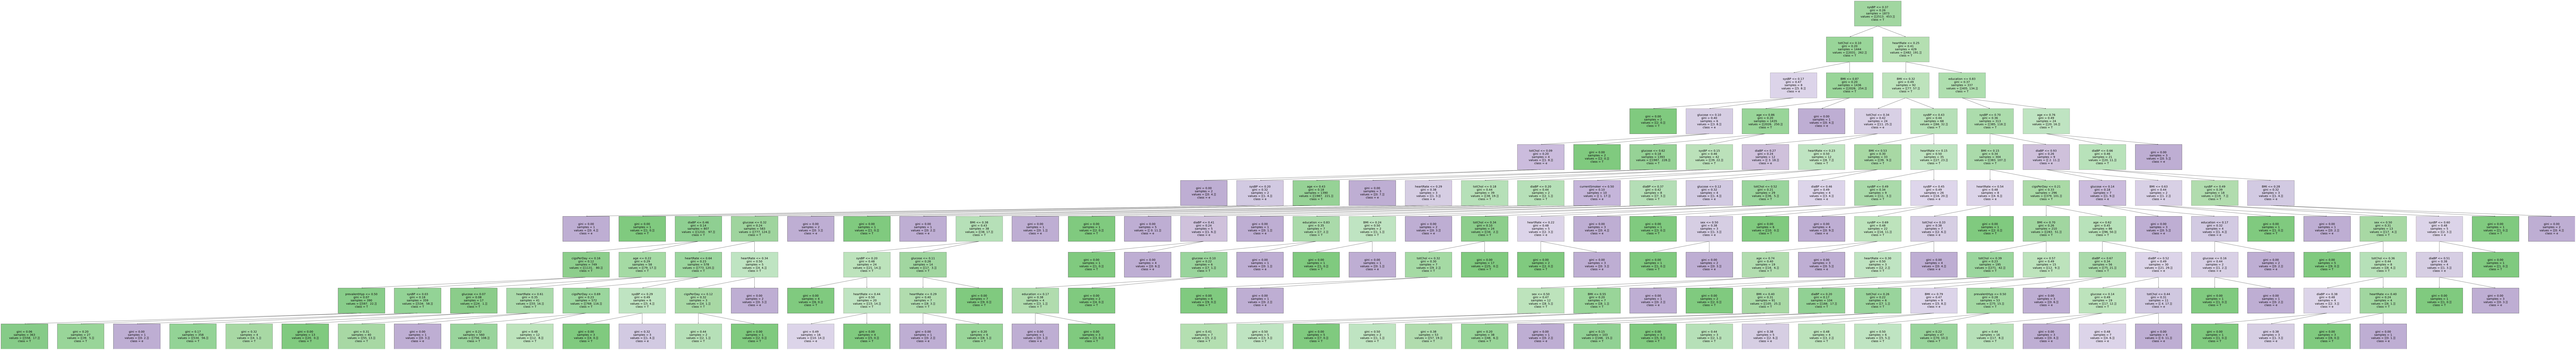

In [112]:
# PLotting 10th single Decision Tree from Random Forest
from dtreeplt import dtreeplt
dtree = dtreeplt(model=clf.estimators_[4], feature_names=Predictors, target_names=TargetVariable)
fig = dtree.view()

## AdaBoost

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=3,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

,sex,age,education,currentSmoker,cigsPerDay,prevalentHyp,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,PredictedTenYearCHD
0,1.0,0.815789,0.000000,0.0,0.000000,1.0,0.232493,0.387387,0.444444,0.383014,0.282828,0.129944,0,0
1,1.0,0.342105,0.666667,0.0,0.000000,0.0,0.154062,0.249249,0.433862,0.411104,0.414141,0.121469,0,0
2,0.0,0.500000,0.000000,1.0,0.033333,0.0,0.431373,0.261261,0.349206,0.155321,0.313131,0.158192,0,0
3,1.0,0.342105,0.666667,1.0,0.500000,0.0,0.400560,0.255255,0.439153,0.434237,0.313131,0.146893,0,0
4,0.0,0.342105,0.333333,1.0,0.050000,0.0,0.400560,0.279279,0.338624,0.155321,0.464646,0.129944,0,0


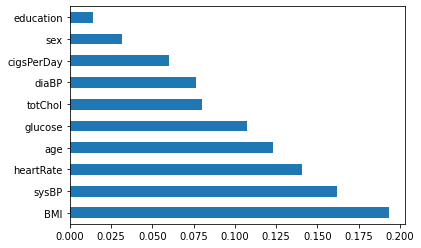

In [116]:
# Adaboost 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Choosing Decision Tree with 1 level as the weak learner
DTC=DecisionTreeClassifier(max_depth=3)
clf = AdaBoostClassifier(n_estimators=1000, base_estimator=DTC ,learning_rate=0.01)

# Printing all the parameters of Adaboost
print(clf)

# Creating the model on Training Data
AB=clf.fit(X_train,y_train)
prediction=AB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model:', round(F1_Score,2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults['Predicted'+ TargetVariable]=prediction
TestingDataResults.head()

In [117]:
print('Accuracy of Model is',metrics.f1_score(y_test, prediction, average='weighted'))

Accuracy of Model is 0.8084091275804889


### Plotting one of the Decision trees from Adaboost

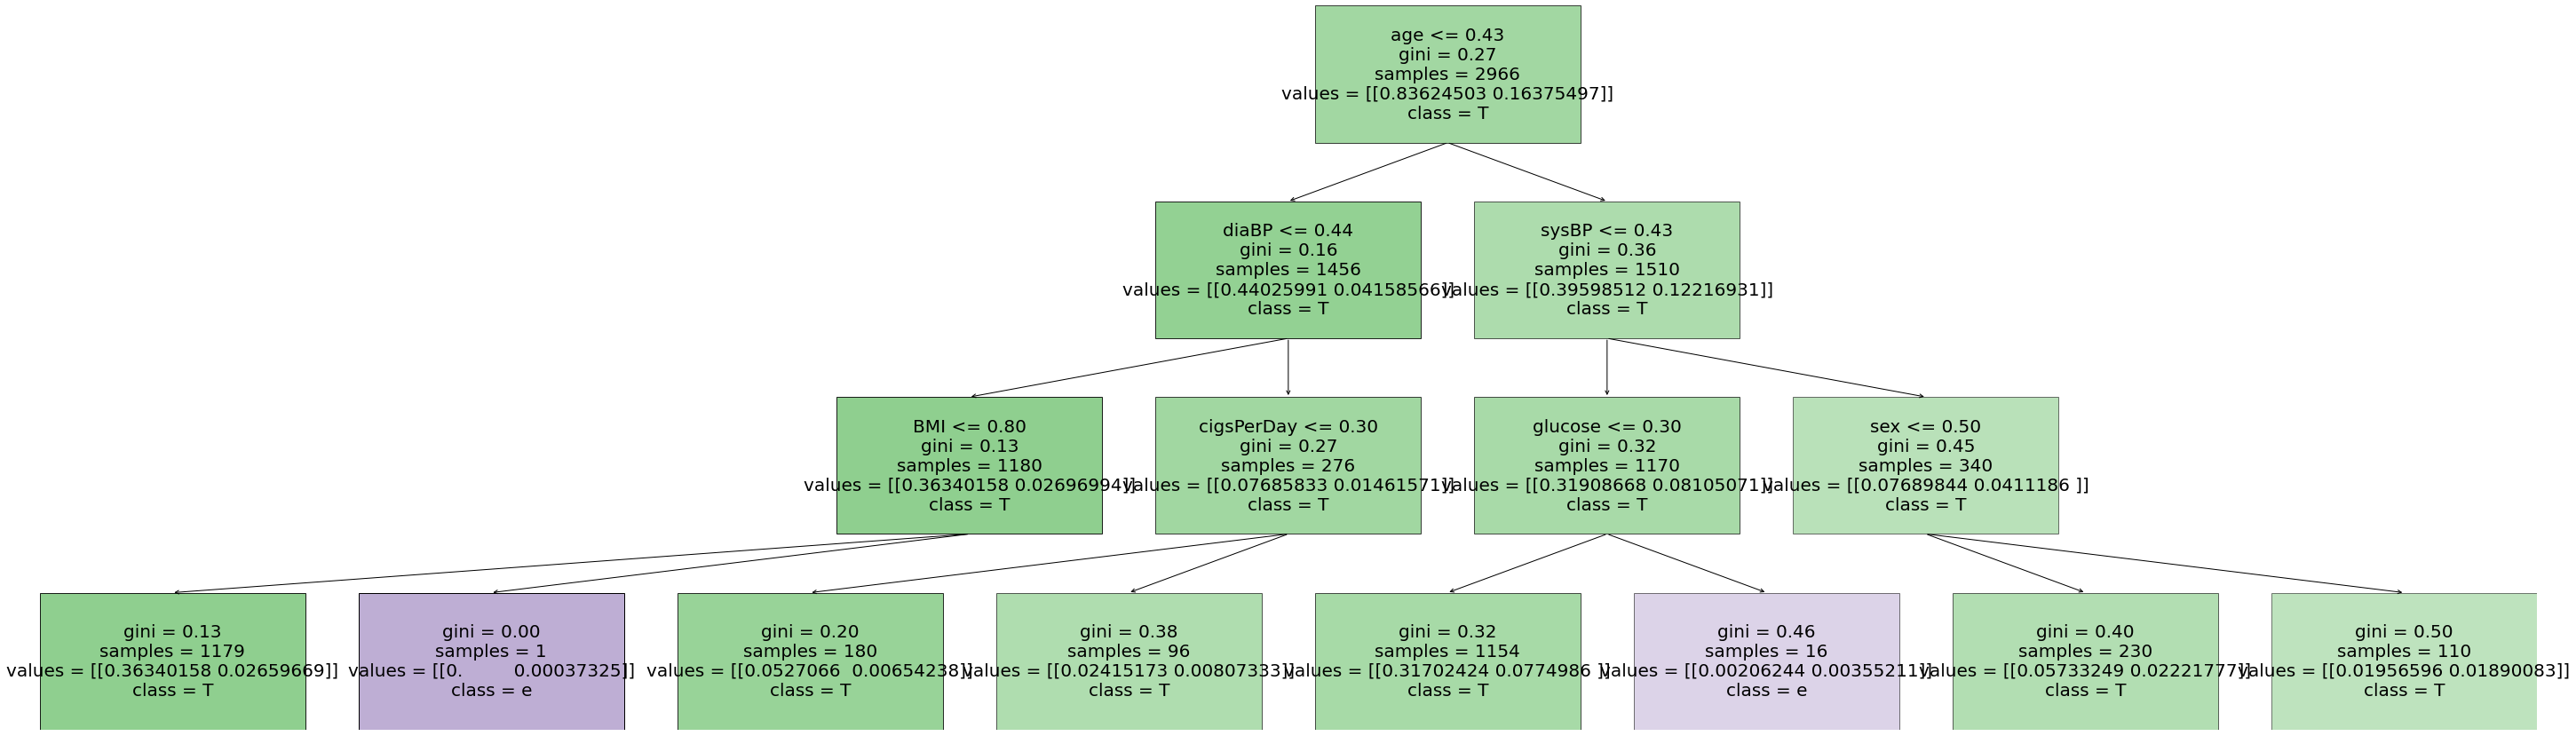

In [118]:
# PLotting 5th single Decision Tree from Adaboost
from dtreeplt import dtreeplt
dtree = dtreeplt(model=clf.estimators_[5], feature_names=Predictors, target_names=TargetVariable)
fig = dtree.view()

## XGBoost

XGBClassifier(base_score=None, booster='gbtree', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=0.01, max_delta_step=None, max_depth=3,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              objective='binary:logistic', random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, validate_parameters=None, verbosity=None)
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1084
           1       0.52      0.07      0.12       188

    accuracy                           0.85      1272
   macro avg       0.69      0.53      0.52      1272
weighted avg       0.81      0.85      0.80      1272

[[1072   1

,sex,age,education,currentSmoker,cigsPerDay,prevalentHyp,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,PredictedTenYearCHD
0,1.0,0.815789,0.000000,0.0,0.000000,1.0,0.232493,0.387387,0.444444,0.383014,0.282828,0.129944,0,0
1,1.0,0.342105,0.666667,0.0,0.000000,0.0,0.154062,0.249249,0.433862,0.411104,0.414141,0.121469,0,0
2,0.0,0.500000,0.000000,1.0,0.033333,0.0,0.431373,0.261261,0.349206,0.155321,0.313131,0.158192,0,0
3,1.0,0.342105,0.666667,1.0,0.500000,0.0,0.400560,0.255255,0.439153,0.434237,0.313131,0.146893,0,0
4,0.0,0.342105,0.333333,1.0,0.050000,0.0,0.400560,0.279279,0.338624,0.155321,0.464646,0.129944,0,0


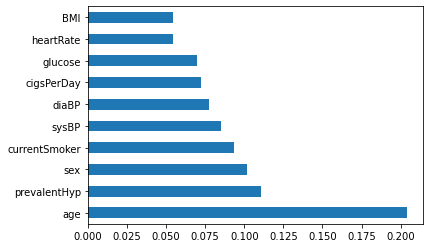

In [125]:
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBClassifier
clf=XGBClassifier(max_depth=3, learning_rate=0.01, n_estimators=1000, objective='binary:logistic', booster='gbtree')

# Printing all the parameters of XGBoost
print(clf)

# Creating the model on Training Data
XGB=clf.fit(X_train,y_train)
prediction=XGB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model:', round(F1_Score,2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults['Predicted'+ TargetVariable]=prediction
TestingDataResults.head()

In [126]:
print('Accuracy of Model is',metrics.f1_score(y_test, prediction, average='weighted'))

Accuracy of Model is 0.8018762089981861


### Plotting a single Decision tree out of XGBoost

In [127]:
import os
os.environ["PATH"] += os.pathsep + 'C:\\Users\\lenovo\\anaconda3\\Library\\bin\\graphviz'

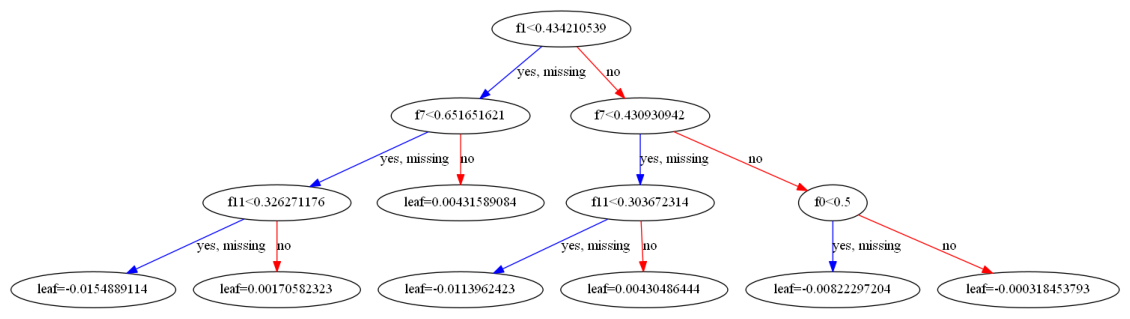

In [128]:
from xgboost import plot_tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 8))
plot_tree(XGB, num_trees=10, ax=ax)

## KNN

In [129]:
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

# Printing all the parameters of KNN
print(clf)

# Creating the model on Training Data
KNN=clf.fit(X_train,y_train)
prediction=KNN.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model:', round(F1_Score,2))


# Plotting the feature importance for Top 10 most important columns
# There is no built-in method to get feature importance in KNN

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults['TargetColumn']=y_test
TestingDataResults['Predicted'+ TargetVariable]=prediction
TestingDataResults.head()

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')
              precision    recall  f1-score   support

           0       0.87      0.95      0.90      1084
           1       0.33      0.15      0.21       188

    accuracy                           0.83      1272
   macro avg       0.60      0.55      0.56      1272
weighted avg       0.79      0.83      0.80      1272

[[1026   58]
 [ 159   29]]
Accuracy of the model: 0.8


,sex,age,education,currentSmoker,cigsPerDay,prevalentHyp,totChol,sysBP,diaBP,BMI,heartRate,glucose,TargetColumn,PredictedTenYearCHD
0,1.0,0.815789,0.000000,0.0,0.000000,1.0,0.232493,0.387387,0.444444,0.383014,0.282828,0.129944,0,1
1,1.0,0.342105,0.666667,0.0,0.000000,0.0,0.154062,0.249249,0.433862,0.411104,0.414141,0.121469,0,0
2,0.0,0.500000,0.000000,1.0,0.033333,0.0,0.431373,0.261261,0.349206,0.155321,0.313131,0.158192,0,0
3,1.0,0.342105,0.666667,1.0,0.500000,0.0,0.400560,0.255255,0.439153,0.434237,0.313131,0.146893,0,0
4,0.0,0.342105,0.333333,1.0,0.050000,0.0,0.400560,0.279279,0.338624,0.155321,0.464646,0.129944,0,0


We are getting highest accuracy of 0.808 with AdaBoost model.

## K-Fold Cross Validation

In [130]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

In [131]:
# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(AB, X , y, cv=10, scoring='f1_weighted')
print(Accuracy_Values)
print('Final Average Accuracy of the model:', Accuracy_Values.mean())

[0.77915867 0.78942164 0.78875342 0.79722188 0.78825553 0.78202775
 0.78746029 0.79594124 0.78349    0.7821309 ]
Final Average Accuracy of the model: 0.7873861314147018


We see that on passing full data ,i.e., train+test , we are getting accuracy of 78.7%.

In [133]:
## Feature importance chart of Ada Boost Model

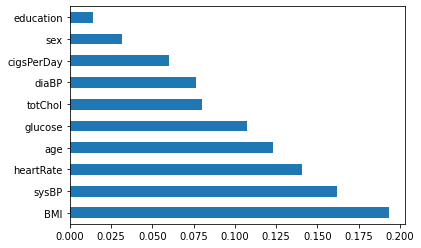

In [132]:
# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

So, our top 5 predictors are 

* BMI
* sysBP
* heartRate
* age
* glucose